### 社交网络分析

#### 设备指纹

可以把手机设备理解成一个人，像人一样有身份证号和名字（设备序列号等），没有化妆（篡改）、没有被假冒（设备账户被盗用、冒用)等，是用于唯一标识出该设备的设备特征或者独特的设备标识。

一般都是基于某些设备信息，通过一些设备指纹算法会将这些信息组合起来，通过特定的hash算法得到一个最后的ID值，作为该设备的唯一标识符。常见的元素有：

- sim卡信息
- wifi信息
- 硬盘信息
- 内存信息
- 屏幕信息
- 设备的传感器特征，比如麦克风、加速传感器、摄像头等信息
- 浏览器本身的特征，包括UA，版本，操作系统信息等
- 浏览器中插件的配置，主要是插件的类型与版本号等
- 设备操作系统的特征，比如是否越狱等
- 浏览器的Canvas特征，影响该特征的因素有GPU特性造成的渲染差异，屏幕的分辨率以及系统不同字体的设置等

主动式设备指纹技术需要在客户端上植入自己的Javascript或SDK代码，主动收集设备相关的特征，用以标识设备和用户。在特征的选取上，需要考虑特征的稳定性和准确度。理想的特征应该在一定的时间段内不会因为外界的条件变化、或是用户的操作行为而发生变化，同时在不同的设备上具有显著的差异。

最基础的反欺诈做法呢，就是收集一定的数据，定义一些规则，不过主要看经验。但是很多时候是很难单一发现问题的，比如是否同一个手机号映射多个姓名，同一个手机，映射多个申请订单，等等。  
  
这种一方面采用大数据的手段，建立宽表，然后定义一些规则，判断是否欺诈，去过滤掉一些客群。但有时候又有很多误判，比如，同一个手机号映射多个人名我们无法判断哪个是真还是假，只能全部拦截。可是很多公司的获客成本都比较高，放掉损失很大，这时候就可以用到我们现在反欺诈的主要手段--知识图谱。  

#### 知识图谱

知识图谱(Knowledge Graph/Vault)又称为科学知识图谱，2012年由谷歌提出，如今已经成为人工智能领域的热门问题之一，吸引了来自学术界和工业界的广泛关注，在一系列实际应用中取得了较好的落地效果，产生了巨大的社会与经济效益，其中包括金融领域。

知识图谱基于二元关系的知识库，构成网状结构。基于图的数据结构，以图的方式存储知识并向用户返回经过加工和推理的知识。它由“节点”和“边”组成，节点表示现实世界中存在的“实体”，边表示实体与实体之间的“关系”，其基本组成单位是“实体-关系-实体”的三元组，实体之间通过关系相互联结。

主要应用场景：

- 反欺诈
- 风险预测
- 催收
- 精准营销
- 智能搜索


举个例子来说明构建知识图谱的流程，此处我们采用个人信息（也可以是设备指纹，总之有可能是虚假的数据）进行一个场景构建。

1）通过对数据进行清理，抽取，构建知识图谱的节点，比如工作地址，姓名，身份证，GPS，工作地点，单位，IP，联系人手机号，等等。

2）比较好的方式是建立基础信息表，然后不断更新，这种方式比较好的原因是可以防止异常，可以保证数据最终一致性。这个就会根据不同情况，构建不同基础数据表，少则十几个，二十几个，多的可以成百上千。

3）基于清洗后的信息，进入图数据库，构建出整个知识图谱。

4）基于图算法进行相关的特征抽取或者通过网络结构进行负样本挖掘

In [28]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
edge_list=pd.read_csv('./data/stack_network_links.csv')
edge_list.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


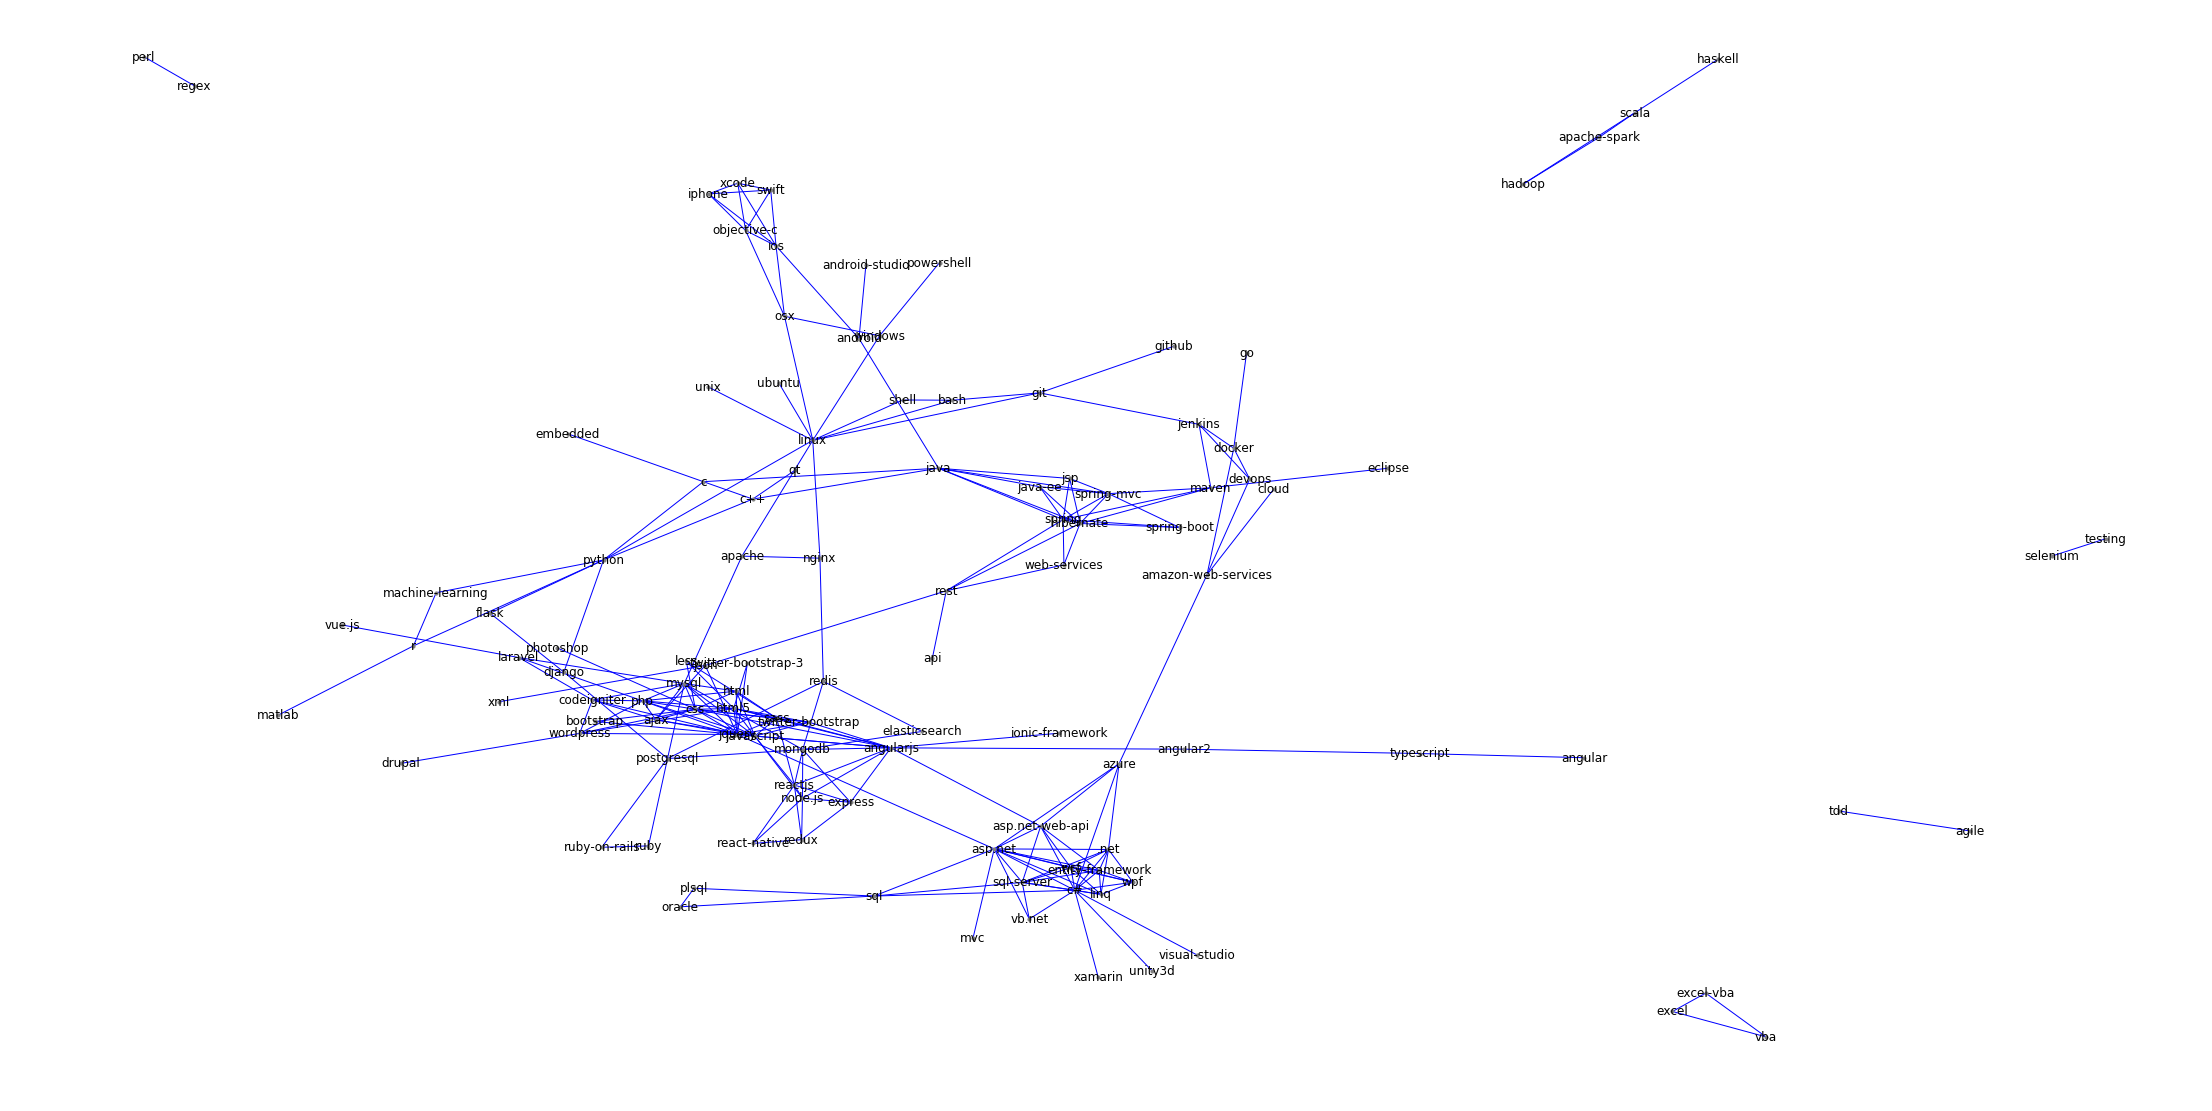

In [55]:
G=nx.from_pandas_edgelist(edge_list,edge_attr='value' )

plt.figure(figsize=(30,15))

nx.draw(G,with_labels=True,
        edge_color='blue',
        node_color='grey',
        node_size=10,
        pos=nx.spring_layout(G,k=0.1,iterations=40))

**特征抽取：**

- 不一致性检验
- 静态分析
- 动态分析
- 关联特征提取

**网络信息挖掘：**

- 社区发现

**负样本生成：**

- 染色

#### 不一致性检验

在团簇中，如果用户的信息与我们的正常理解有严重偏差，那么这种团簇很可疑；如两个用户拥有同个家庭wifi，但所填家庭地址相差甚远，显然与现实不符。这里需要大量的人工干预，因为我们不能通过欺诈标签做相关的统计分析，更多的要靠经验判断。当然如果标签得当，我们其实可以通过做相似性度量来进行筛选重要的关联特征，作为规则的。

#### 关联特征提取

对网络特征的直接提取，提取出中心度或一度二度关联特征可供上层规则系统或风险评估模型使用。基本思想仍然是在网络中社交越广泛，越有可能是一个坏人。

反欺诈对于实时决策的需求很高，这些指标都需要实时提取。其中一些指标，比如二度关联度, 在一般的情况下计算复杂度是很高的。在动态图的情形下，一般会采取一些近似的算法并进行预计算。

#### 静态分析

给定时间节点，去尝试发现图形结构的异常子图。

#### 动态分析

分析结构网络|随着时间变化的趋势

#### 失联模型

挖掘更多的潜在的可触达联系人。

#### 社区发现



#### 染色

染色本质就是一种基于关联图谱的半监督学习方法，我们知道在反欺诈的场景下，一个典型的困境就是欺诈标注非常少，获得的代价非常高，而我们要做一些监督式的机器学习，却又非常依赖于标注。因此如果能用少量的欺诈标注样本产生出更多的标注，就能最大程度利用欺诈样本。这就是染色的初衷，欺诈标注会沿着网络里的边从一个节点传播到另一个节点。  

染色从直觉上比较容易理解，我们经常说近朱者赤，近墨者黑。一个用户和坏用户有关联，其实很有可能他本身就是有问题的。这里放一个数据，根据分析得到，一个客户一旦出现在某个坏客户的通讯录中，就有70%的概率会变坏。  

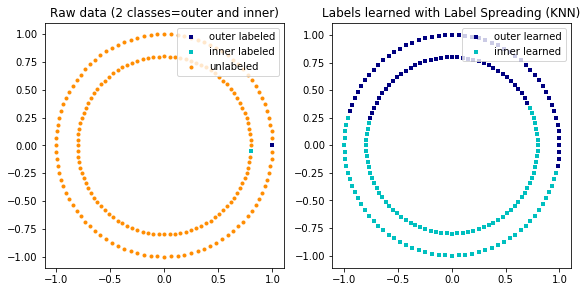

In [2]:
#基于sklearn标签传播算法示例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import label_propagation
from sklearn.datasets import make_circles

# generate ring with inner box
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.)
labels[0] = outer
labels[-1] = inner
# Learn with LabelSpreading
label_spread = label_propagation.LabelSpreading(kernel='rbf', alpha=0.8)
label_spread.fit(X, labels)

# Plot output labels
output_labels = label_spread.transduction_
plt.figure(figsize=(8.5, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

plt.subplot(1, 2, 2)
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='navy',
            marker='s', lw=0, s=10, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='c',
            marker='s', lw=0, s=10, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Spreading (KNN)")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()

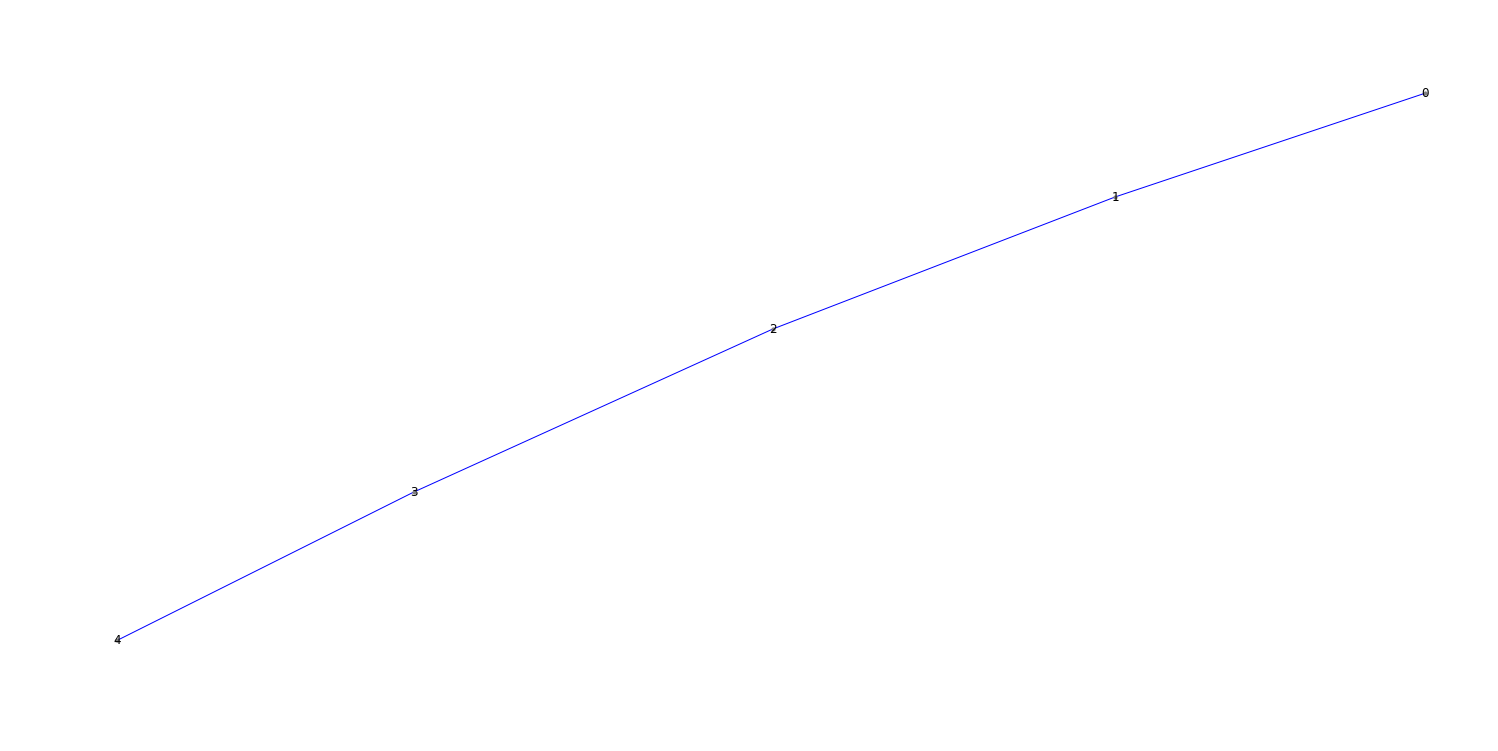

In [26]:
#图谱中的标签传播算法
#生成一个连续连通图
G = nx.path_graph(5)
G.node[0]['label'] = 'A'
G.node[3]['label'] = 'B'
G.nodes(data=True)

plt.figure(figsize=(20,10))

nx.draw(G,with_labels=True,
        edge_color='blue',
        node_color='grey',
        node_size=10,
        pos=nx.spring_layout(G,k=0.1,iterations=40))

In [27]:
predicted = nx.node_classification.local_and_global_consistency(G)
predicted

['A', 'B', 'B', 'B', 'B']

#### 关键特征提取

In [56]:
#度
nx.degree(G)

DegreeView({'azure': 5, '.net': 8, 'sql-server': 9, 'asp.net': 13, 'entity-framework': 8, 'wpf': 6, 'linq': 7, 'wcf': 8, 'c#': 14, 'tdd': 1, 'agile': 1, 'codeigniter': 6, 'ajax': 7, 'jquery': 16, 'mysql': 11, 'css': 14, 'php': 10, 'javascript': 12, 'json': 4, 'cloud': 1, 'amazon-web-services': 4, 'devops': 3, 'docker': 4, 'ios': 6, 'android': 3, 'android-studio': 1, 'java': 8, 'typescript': 2, 'angular': 1, 'angular2': 2, 'angularjs': 13, 'ionic-framework': 1, 'reactjs': 8, 'mongodb': 8, 'sass': 9, 'twitter-bootstrap': 6, 'express': 5, 'node.js': 7, 'asp.net-web-api': 7, 'html5': 10, 'nginx': 3, 'apache': 3, 'linux': 10, 'scala': 3, 'apache-spark': 2, 'hadoop': 2, 'rest': 5, 'api': 1, 'sql': 5, 'mvc': 1, 'vb.net': 3, 'bash': 3, 'shell': 2, 'git': 4, 'bootstrap': 2, 'c++': 4, 'c': 4, 'python': 7, 'embedded': 1, 'xamarin': 1, 'unity3d': 1, 'visual-studio': 1, 'qt': 1, 'laravel': 4, 'wordpress': 6, 'photoshop': 1, 'html': 6, 'less': 3, 'jenkins': 4, 'django': 3, 'flask': 2, 'postgresql': 

In [57]:
#度中心性 m/(n-1)
nx.degree_centrality(G)

{'azure': 0.043859649122807015,
 '.net': 0.07017543859649122,
 'sql-server': 0.07894736842105263,
 'asp.net': 0.11403508771929824,
 'entity-framework': 0.07017543859649122,
 'wpf': 0.05263157894736842,
 'linq': 0.06140350877192982,
 'wcf': 0.07017543859649122,
 'c#': 0.12280701754385964,
 'tdd': 0.008771929824561403,
 'agile': 0.008771929824561403,
 'codeigniter': 0.05263157894736842,
 'ajax': 0.06140350877192982,
 'jquery': 0.14035087719298245,
 'mysql': 0.09649122807017543,
 'css': 0.12280701754385964,
 'php': 0.08771929824561403,
 'javascript': 0.10526315789473684,
 'json': 0.03508771929824561,
 'cloud': 0.008771929824561403,
 'amazon-web-services': 0.03508771929824561,
 'devops': 0.02631578947368421,
 'docker': 0.03508771929824561,
 'ios': 0.05263157894736842,
 'android': 0.02631578947368421,
 'android-studio': 0.008771929824561403,
 'java': 0.07017543859649122,
 'typescript': 0.017543859649122806,
 'angular': 0.008771929824561403,
 'angular2': 0.017543859649122806,
 'angularjs': 0

In [58]:
nx.betweenness_centrality(G)

{'azure': 0.054000196569856024,
 '.net': 0.002291495700904178,
 'sql-server': 0.0035624458060689187,
 'asp.net': 0.17406690608353656,
 'entity-framework': 0.0010466285487518948,
 'wpf': 0.0,
 'linq': 2.5875899187496765e-05,
 'wcf': 0.0010466285487518948,
 'c#': 0.05575657988189837,
 'tdd': 0.0,
 'agile': 0.0,
 'codeigniter': 0.007164044704799249,
 'ajax': 0.018884826898334116,
 'jquery': 0.25553997534572337,
 'mysql': 0.19769314773273786,
 'css': 0.04133537048548419,
 'php': 0.011546520113878122,
 'javascript': 0.023657465051749836,
 'json': 0.12319763505138448,
 'cloud': 0.0,
 'amazon-web-services': 0.05643737397347083,
 'devops': 0.015288500162743298,
 'docker': 0.03081403967524134,
 'ios': 0.03848717309360066,
 'android': 0.03133053873622108,
 'android-studio': 0.0,
 'java': 0.07601405167311086,
 'typescript': 0.01552553951249806,
 'angular': 0.0,
 'angular2': 0.030740568234746156,
 'angularjs': 0.12286762799187793,
 'ionic-framework': 0.0,
 'reactjs': 0.01540985613288964,
 'mongodb

In [59]:
nx.closeness_centrality(G)

{'azure': 0.2120437349297414,
 '.net': 0.20199200031681913,
 'sql-server': 0.2047653458589265,
 'asp.net': 0.24650814363733023,
 'entity-framework': 0.20336921850079745,
 'wpf': 0.1966647387700019,
 'linq': 0.1970979210139887,
 'wcf': 0.20336921850079745,
 'c#': 0.2120437349297414,
 'tdd': 0.008771929824561403,
 'agile': 0.008771929824561403,
 'codeigniter': 0.24448758508292587,
 'ajax': 0.2586198154345401,
 'jquery': 0.2895872367001647,
 'mysql': 0.2778958265228288,
 'css': 0.25787451337276907,
 'php': 0.2513552138773901,
 'javascript': 0.2571334946561807,
 'json': 0.2458309234625024,
 'cloud': 0.1654019522002789,
 'amazon-web-services': 0.20290806381031945,
 'devops': 0.1970979210139887,
 'docker': 0.19753301576236396,
 'ios': 0.17896491228070177,
 'android': 0.1737523420200988,
 'android-studio': 0.14549992868349734,
 'java': 0.20018446563836884,
 'typescript': 0.16509678254677285,
 'angular': 0.13938077280428485,
 'angular2': 0.20153706337916866,
 'angularjs': 0.2571334946561807,
 

In [60]:
nx.katz_centrality(G)

{'azure': 0.086000597404453,
 '.net': 0.12752395048659432,
 'sql-server': 0.13490800430383726,
 'asp.net': 0.1838839825412127,
 'entity-framework': 0.1313654632872137,
 'wpf': 0.1074413543796159,
 'linq': 0.11970571584751195,
 'wcf': 0.1313654632872137,
 'c#': 0.16287279019149037,
 'tdd': 0.024188487461603535,
 'agile': 0.024188487461603535,
 'codeigniter': 0.13405042234441555,
 'ajax': 0.17009541155997618,
 'jquery': 0.30513597783897295,
 'mysql': 0.20736972742053683,
 'css': 0.2753226815308488,
 'php': 0.2187064376319827,
 'javascript': 0.2654431371952479,
 'json': 0.0772301825655986,
 'cloud': 0.025746815297941216,
 'amazon-web-services': 0.039771768002536595,
 'devops': 0.032987025719495855,
 'docker': 0.03528687353843744,
 'ios': 0.04480929107470212,
 'android': 0.03501405935072478,
 'android-studio': 0.025271044646416534,
 'java': 0.06236387099104653,
 'typescript': 0.029049352694621024,
 'angular': 0.024674573815228796,
 'angular2': 0.0481225808512019,
 'angularjs': 0.2344801973

In [62]:
#连通子图
list(nx.connected_components(G))[0]

{'.net',
 'ajax',
 'amazon-web-services',
 'android',
 'android-studio',
 'angular',
 'angular2',
 'angularjs',
 'apache',
 'api',
 'asp.net',
 'asp.net-web-api',
 'azure',
 'bash',
 'bootstrap',
 'c',
 'c#',
 'c++',
 'cloud',
 'codeigniter',
 'css',
 'devops',
 'django',
 'docker',
 'drupal',
 'eclipse',
 'elasticsearch',
 'embedded',
 'entity-framework',
 'express',
 'flask',
 'git',
 'github',
 'go',
 'hibernate',
 'html',
 'html5',
 'ionic-framework',
 'ios',
 'iphone',
 'java',
 'java-ee',
 'javascript',
 'jenkins',
 'jquery',
 'json',
 'jsp',
 'laravel',
 'less',
 'linq',
 'linux',
 'machine-learning',
 'matlab',
 'maven',
 'mongodb',
 'mvc',
 'mysql',
 'nginx',
 'node.js',
 'objective-c',
 'oracle',
 'osx',
 'photoshop',
 'php',
 'plsql',
 'postgresql',
 'powershell',
 'python',
 'qt',
 'r',
 'react-native',
 'reactjs',
 'redis',
 'redux',
 'rest',
 'ruby',
 'ruby-on-rails',
 'sass',
 'shell',
 'spring',
 'spring-boot',
 'spring-mvc',
 'sql',
 'sql-server',
 'swift',
 'twitter-b

In [63]:
# 取出网络的最大子图
Sub_G=G.subgraph(list(nx.connected_components(G))[0])

In [64]:
#计算节点的聚类系数
nx.clustering(Sub_G) 

{'azure': 0.5,
 '.net': 0.7857142857142857,
 'sql-server': 0.6388888888888888,
 'asp.net': 0.3974358974358974,
 'entity-framework': 0.8571428571428571,
 'wpf': 1.0,
 'linq': 0.9523809523809523,
 'wcf': 0.8571428571428571,
 'c#': 0.34065934065934067,
 'codeigniter': 0.6666666666666666,
 'ajax': 0.6666666666666666,
 'jquery': 0.3333333333333333,
 'mysql': 0.36363636363636365,
 'css': 0.3956043956043956,
 'php': 0.5777777777777777,
 'javascript': 0.5151515151515151,
 'json': 0.16666666666666666,
 'cloud': 0,
 'amazon-web-services': 0.16666666666666666,
 'devops': 0.6666666666666666,
 'docker': 0.3333333333333333,
 'ios': 0.4666666666666667,
 'android': 0,
 'android-studio': 0,
 'java': 0.35714285714285715,
 'typescript': 0,
 'angular': 0,
 'angular2': 0,
 'angularjs': 0.3076923076923077,
 'ionic-framework': 0,
 'reactjs': 0.5,
 'mongodb': 0.32142857142857145,
 'sass': 0.6111111111111112,
 'twitter-bootstrap': 1.0,
 'express': 0.8,
 'node.js': 0.5714285714285714,
 'asp.net-web-api': 0.5714

In [47]:
#计算网络的聚类系数
nx.average_clustering(Sub_G) 

0.0

In [66]:
#计算网络的平均路径
#只能在连通子图中求解
nx.average_shortest_path_length(Sub_G) 

4.507862550960978